<a href="https://colab.research.google.com/github/aksanaboo/lego/blob/main/legoEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
lego = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lego_sets_and_themes.csv')

In [ ]:
lego.head()

,set_number,set_name,year_released,number_of_parts,image_url,theme_name
0,001-1,Gears,1965.0,43.0,https://cdn.rebrickable.com/media/sets/001-1.jpg,Technic
1,002-1,4.5V Samsonite Gears Motor Set,1965.0,3.0,https://cdn.rebrickable.com/media/sets/002-1.jpg,Technic
2,1030-1,TECHNIC I: Simple Machines Set,1985.0,210.0,https://cdn.rebrickable.com/media/sets/1030-1.jpg,Technic
3,1038-1,ERBIE the Robo-Car,1985.0,120.0,https://cdn.rebrickable.com/media/sets/1038-1.jpg,Technic
4,1039-1,Manual Control Set 1,1986.0,39.0,https://cdn.rebrickable.com/media/sets/1039-1.jpg,Technic


In [ ]:
lego.columns

Index(['set_number', 'set_name', 'year_released', 'number_of_parts',
       'image_url', 'theme_name'],
      dtype='object')

In [ ]:
lego.shape

(21503, 6)

In [ ]:
lego.isnull().sum()

set_number         7
set_name           7
year_released      7
number_of_parts    7
image_url          7
theme_name         0
dtype: int64

In [ ]:
#no duplicates present
lego.duplicated().sum()

0

In [ ]:
null_values = lego.isnull().sum()
null_values

set_number         7
set_name           7
year_released      7
number_of_parts    7
image_url          7
theme_name         0
dtype: int64

In [ ]:
null_val = lego[lego.isnull().any(axis=1)]

In [ ]:
null_val.shape

(7, 6)

In [ ]:
null_val

,set_number,set_name,year_released,number_of_parts,image_url,theme_name
702,NaN,NaN,NaN,NaN,NaN,Basic Model
2571,NaN,NaN,NaN,NaN,NaN,Speed Racer
2917,NaN,NaN,NaN,NaN,NaN,Pirates
4935,NaN,NaN,NaN,NaN,NaN,RC Train
5616,NaN,NaN,NaN,NaN,NaN,Adventurers
9165,NaN,NaN,NaN,NaN,NaN,Fabuland
14764,NaN,NaN,NaN,NaN,NaN,The Hobbit and Lord of the Rings


In [ ]:
lego = lego.dropna()

In [ ]:
lego.theme_name.value_counts()

Star Wars            913
Technic              857
Books                699
Key Chain            693
Friends              568
                    ... 
Jurassic Park III      2
Legoland               1
Adventurers            1
Aquazone               1
Mini                   1
Name: theme_name, Length: 380, dtype: int64

In [ ]:
lego.year_released.value_counts()

2021.0    1142
2019.0    1023
2020.0    1014
2022.0    1008
2018.0     934
          ... 
1950.0       6
1949.0       5
1953.0       4
1959.0       4
1960.0       3
Name: year_released, Length: 73, dtype: int64

In [ ]:
lego.head()

,set_number,set_name,year_released,number_of_parts,image_url,theme_name
0,001-1,Gears,1965.0,43.0,https://cdn.rebrickable.com/media/sets/001-1.jpg,Technic
1,002-1,4.5V Samsonite Gears Motor Set,1965.0,3.0,https://cdn.rebrickable.com/media/sets/002-1.jpg,Technic
2,1030-1,TECHNIC I: Simple Machines Set,1985.0,210.0,https://cdn.rebrickable.com/media/sets/1030-1.jpg,Technic
3,1038-1,ERBIE the Robo-Car,1985.0,120.0,https://cdn.rebrickable.com/media/sets/1038-1.jpg,Technic
4,1039-1,Manual Control Set 1,1986.0,39.0,https://cdn.rebrickable.com/media/sets/1039-1.jpg,Technic


In [ ]:
#Data Visualisation

In [ ]:
num_parts = lego.groupby('year_released')['number_of_parts'].mean()

In [ ]:
num_parts = pd.DataFrame(num_parts)

In [ ]:
num_parts.head()

,number_of_parts
year_released,
1949.0,99.600000
1950.0,1.000000
1953.0,12.500000
1954.0,8.357143
1955.0,12.205128


In [ ]:
num_parts = num_parts.reset_index()

In [ ]:
num_parts.head()

,year_released,number_of_parts
0,1949.0,99.600000
1,1950.0,1.000000
2,1953.0,12.500000
3,1954.0,8.357143
4,1955.0,12.205128


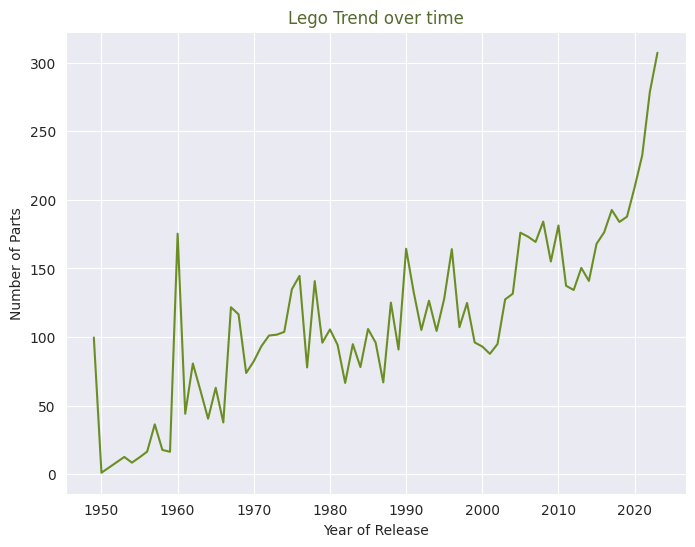

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=num_parts['year_released'],y=num_parts['number_of_parts'],color='olivedrab')
sns.set_style('darkgrid')

plt.xlabel('Year of Release')
plt.ylabel('Number of Parts')
plt.title('Lego Trend over time',color='darkolivegreen')
plt.show()

In [ ]:
# conclusion = increase in lego parts with time

In [ ]:
theme = lego.groupby('year_released')['theme_name'].count()

In [ ]:
theme = pd.DataFrame(theme)

In [ ]:
theme.head()

,theme_name
year_released,
1949.0,5
1950.0,6
1953.0,4
1954.0,14
1955.0,39


In [ ]:
theme = theme.reset_index()

In [ ]:
theme.head()

,year_released,theme_name
0,1949.0,5
1,1950.0,6
2,1953.0,4
3,1954.0,14
4,1955.0,39


In [ ]:
theme.rename(columns={'theme_name':'number_of_themes'},inplace=True)

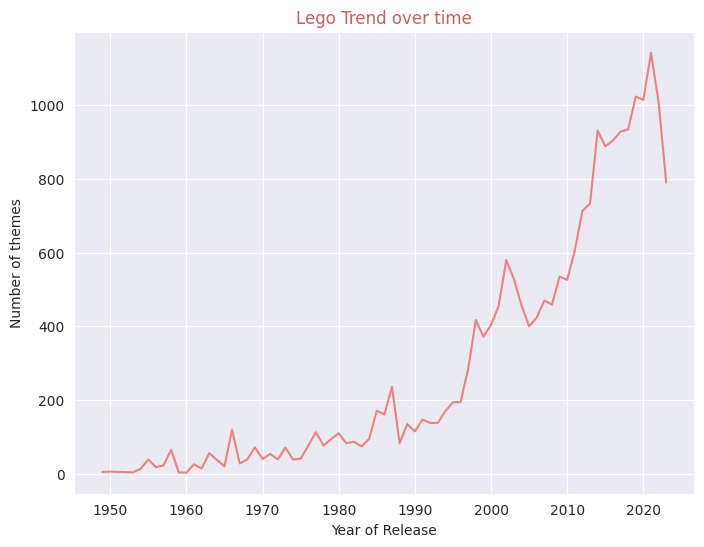

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=theme['year_released'],y=theme['number_of_themes'],color='lightcoral')
sns.set_style('darkgrid')

plt.xlabel('Year of Release')
plt.ylabel('Number of themes')
plt.title('Lego Trend over time',color='indianred')
plt.show()

In [ ]:
#conclusion = increase in lego themes with time

In [ ]:
# 380 different themes
lego.theme_name.value_counts()

Star Wars            913
Technic              857
Books                699
Key Chain            693
Friends              568
                    ... 
Jurassic Park III      2
Legoland               1
Adventurers            1
Aquazone               1
Mini                   1
Name: theme_name, Length: 380, dtype: int64

In [ ]:
# when does each theme released year

In [ ]:
year = lego[['year_released','theme_name']]

In [ ]:
year.head()

,year_released,theme_name
0,1965.0,Technic
1,1965.0,Technic
2,1985.0,Technic
3,1985.0,Technic
4,1986.0,Technic


In [ ]:
first_release_years = year.groupby('theme_name')['year_released'].min()

In [ ]:
first_release_years.reset_index()

,theme_name,year_released
0,12V,1969.0
1,4 Juniors,2003.0
2,4.5V,1966.0
3,9V,1991.0
4,Action Wheelers,2000.0
...,...,...
375,X-Pod,2004.0
376,Xtra,2018.0
377,Znap,1998.0
378,Zooters,2001.0


In [ ]:
final_year = year.groupby('theme_name')['year_released'].max()

In [ ]:
final_year.reset_index()

,theme_name,year_released
0,12V,1986.0
1,4 Juniors,2004.0
2,4.5V,1985.0
3,9V,2007.0
4,Action Wheelers,2001.0
...,...,...
375,X-Pod,2006.0
376,Xtra,2021.0
377,Znap,1999.0
378,Zooters,2001.0


In [ ]:
first_release_years = pd.DataFrame(first_release_years)
final_year = pd.DataFrame(final_year)

In [ ]:
first_release_years.reset_index(inplace=True)

In [ ]:
final_year.reset_index()

,theme_name,year_released
0,12V,1986.0
1,4 Juniors,2004.0
2,4.5V,1985.0
3,9V,2007.0
4,Action Wheelers,2001.0
...,...,...
375,X-Pod,2006.0
376,Xtra,2021.0
377,Znap,1999.0
378,Zooters,2001.0


In [ ]:
final_year.rename(columns={'year_released':'final_year_launched'},inplace=True)

In [ ]:
final_year.head()

,final_year_launched
theme_name,
12V,1986.0
4 Juniors,2004.0
4.5V,1985.0
9V,2007.0
Action Wheelers,2001.0


In [ ]:
lego_theme = pd.merge(first_release_years,final_year,on='theme_name', how='inner')

In [ ]:
lego_theme

,theme_name,year_released,final_year_launched
0,12V,1969.0,1986.0
1,4 Juniors,2003.0,2004.0
2,4.5V,1966.0,1985.0
3,9V,1991.0,2007.0
4,Action Wheelers,2000.0,2001.0
...,...,...,...
375,X-Pod,2004.0,2006.0
376,Xtra,2018.0,2021.0
377,Znap,1998.0,1999.0
378,Zooters,2001.0,2001.0


In [ ]:
lego_theme['years_active'] = lego_theme['final_year_launched']-lego_theme['year_released']

In [ ]:
lego_theme.head()

,theme_name,year_released,final_year_launched,years_active
0,12V,1969.0,1986.0,17.0
1,4 Juniors,2003.0,2004.0,1.0
2,4.5V,1966.0,1985.0,19.0
3,9V,1991.0,2007.0,16.0
4,Action Wheelers,2000.0,2001.0,1.0


In [ ]:
lego_theme = lego_theme.sort_values(by='years_active', ascending=False)

In [ ]:
lego_theme.head()

,theme_name,year_released,final_year_launched,years_active
320,Supplemental,1949.0,2023.0,74.0
27,Basic Set,1953.0,2023.0,70.0
39,Books,1955.0,2023.0,68.0
79,Database Sets,1955.0,2023.0,68.0
56,Classic,1960.0,2023.0,63.0


In [ ]:
lego_theme.years_active.describe()

count    380.000000
mean       9.715789
std       14.698671
min        0.000000
25%        0.000000
50%        3.000000
75%       13.250000
max       74.000000
Name: years_active, dtype: float64

In [ ]:
lego_theme['active'] = lego_theme['final_year_launched'].apply(lambda x: 'active' if x == 2023.0 else 'inactive' )

In [ ]:
lego_theme.head()

,theme_name,year_released,final_year_launched,years_active,active
320,Supplemental,1949.0,2023.0,74.0,active
27,Basic Set,1953.0,2023.0,70.0,active
39,Books,1955.0,2023.0,68.0,active
79,Database Sets,1955.0,2023.0,68.0,active
56,Classic,1960.0,2023.0,63.0,active


In [ ]:
lego_theme.active.value_counts()

inactive    298
active       82
Name: active, dtype: int64

In [ ]:
currently_active = (lego_theme.active == 'active') & (lego_theme.years_active > 0.0)

In [ ]:
lego_theme[currently_active]

,theme_name,year_released,final_year_launched,years_active,active
320,Supplemental,1949.0,2023.0,74.0,active
27,Basic Set,1953.0,2023.0,70.0,active
39,Books,1955.0,2023.0,68.0,active
79,Database Sets,1955.0,2023.0,68.0,active
56,Classic,1960.0,2023.0,63.0,active
...,...,...,...,...,...
175,LEGO Art,2020.0,2023.0,3.0,active
318,Super Mario,2020.0,2023.0,3.0,active
315,Stuntz,2021.0,2023.0,2.0,active
196,Marvel Series 1,2021.0,2023.0,2.0,active


In [ ]:
# popular themes stay in production for 3 or more years

In [ ]:
popular_theme = (lego_theme.active == 'active') & (lego_theme.years_active > 3.0)

In [ ]:
popular = lego_theme[popular_theme]
popular.head()

,theme_name,year_released,final_year_launched,years_active,active
320,Supplemental,1949.0,2023.0,74.0,active
27,Basic Set,1953.0,2023.0,70.0,active
39,Books,1955.0,2023.0,68.0,active
79,Database Sets,1955.0,2023.0,68.0,active
56,Classic,1960.0,2023.0,63.0,active


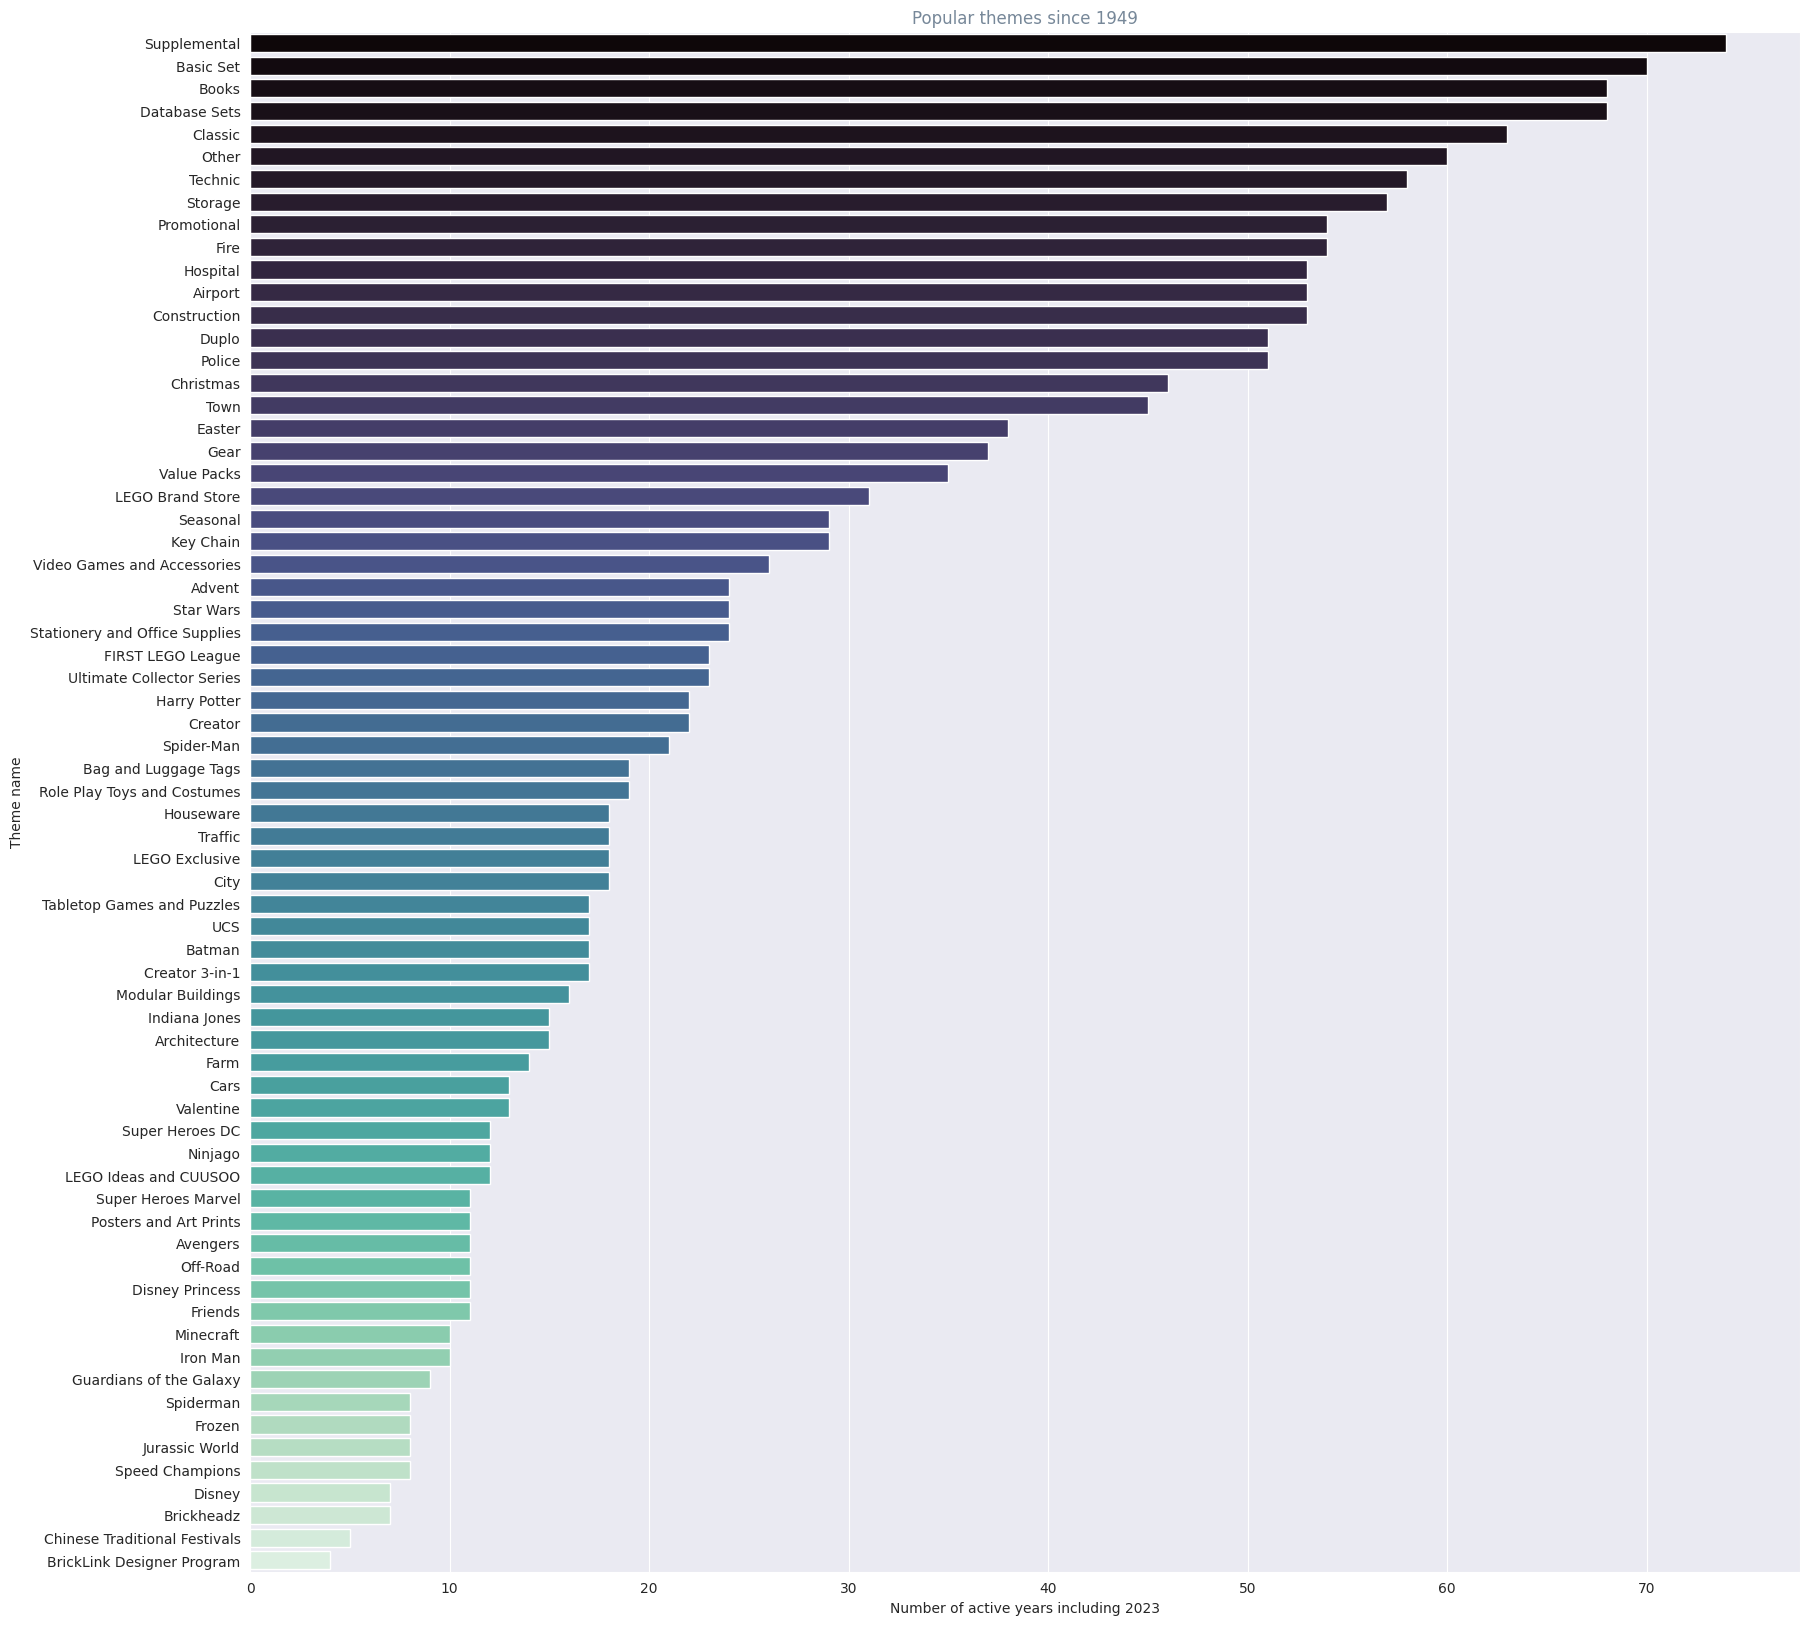

In [ ]:
plt.figure(figsize=(20, 20))
sns.barplot(x='years_active', y='theme_name',data=popular, palette='mako')
plt.xlabel('Number of active years including 2023')
plt.ylabel('Theme name')
plt.title('Popular themes since 1949',color='lightslategrey')
plt.show()

In [ ]:
lego.head()

,set_number,set_name,year_released,number_of_parts,image_url,theme_name
0,001-1,Gears,1965.0,43.0,https://cdn.rebrickable.com/media/sets/001-1.jpg,Technic
1,002-1,4.5V Samsonite Gears Motor Set,1965.0,3.0,https://cdn.rebrickable.com/media/sets/002-1.jpg,Technic
2,1030-1,TECHNIC I: Simple Machines Set,1985.0,210.0,https://cdn.rebrickable.com/media/sets/1030-1.jpg,Technic
3,1038-1,ERBIE the Robo-Car,1985.0,120.0,https://cdn.rebrickable.com/media/sets/1038-1.jpg,Technic
4,1039-1,Manual Control Set 1,1986.0,39.0,https://cdn.rebrickable.com/media/sets/1039-1.jpg,Technic


In [ ]:
lego.isnull().sum()

set_number         0
set_name           0
year_released      0
number_of_parts    0
image_url          0
theme_name         0
dtype: int64

In [ ]:
lego.theme_name.value_counts()

Star Wars            913
Technic              857
Books                699
Key Chain            693
Friends              568
                    ... 
Jurassic Park III      2
Legoland               1
Adventurers            1
Aquazone               1
Mini                   1
Name: theme_name, Length: 380, dtype: int64

In [ ]:
all_the_rage = pd.DataFrame(lego.theme_name.value_counts())

In [ ]:
all_the_rage.head()

,theme_name
Star Wars,913
Technic,857
Books,699
Key Chain,693
Friends,568


In [ ]:
all_the_rage.reset_index(inplace=True)

In [ ]:
all_the_rage

,index,theme_name
0,Star Wars,913
1,Technic,857
2,Books,699
3,Key Chain,693
4,Friends,568
...,...,...
375,Jurassic Park III,2
376,Legoland,1
377,Adventurers,1
378,Aquazone,1


In [ ]:
all_the_rage.rename(columns={'index':'theme_name','theme_name':'count'},inplace=True)

In [ ]:
all_the_rage.head()

,theme_name,count
0,Star Wars,913
1,Technic,857
2,Books,699
3,Key Chain,693
4,Friends,568


In [ ]:
all_the_rage.describe()

,count
count,380.000000
mean,56.568421
std,111.887019
min,1.000000
25%,10.000000
50%,19.000000
75%,51.000000
max,913.000000


In [ ]:
#merge popular and all_the_rage
in_demand = pd.merge(popular,all_the_rage,on='theme_name', how='inner')

In [ ]:
in_demand.head()

,theme_name,year_released,final_year_launched,years_active,active,count
0,Supplemental,1949.0,2023.0,74.0,active,437
1,Basic Set,1953.0,2023.0,70.0,active,478
2,Books,1955.0,2023.0,68.0,active,699
3,Database Sets,1955.0,2023.0,68.0,active,100
4,Classic,1960.0,2023.0,63.0,active,70


In [ ]:
active_group = (in_demand['active'] == 'active') & (in_demand['count'] >= 200)

In [ ]:
sought_after = in_demand[active_group]

In [ ]:
sought_after.head()

,theme_name,year_released,final_year_launched,years_active,active,count
0,Supplemental,1949.0,2023.0,74.0,active,437
1,Basic Set,1953.0,2023.0,70.0,active,478
2,Books,1955.0,2023.0,68.0,active,699
6,Technic,1965.0,2023.0,58.0,active,857
16,Town,1978.0,2023.0,45.0,active,418


In [ ]:
sought_after.shape

(17, 6)

In [ ]:
len(sought_after['count'])

17

In [ ]:
len(sought_after['theme_name'])

17

In [ ]:
sought_after['count'].describe()

count     17.000000
mean     462.764706
std      224.245270
min      213.000000
25%      271.000000
50%      437.000000
75%      568.000000
max      913.000000
Name: count, dtype: float64

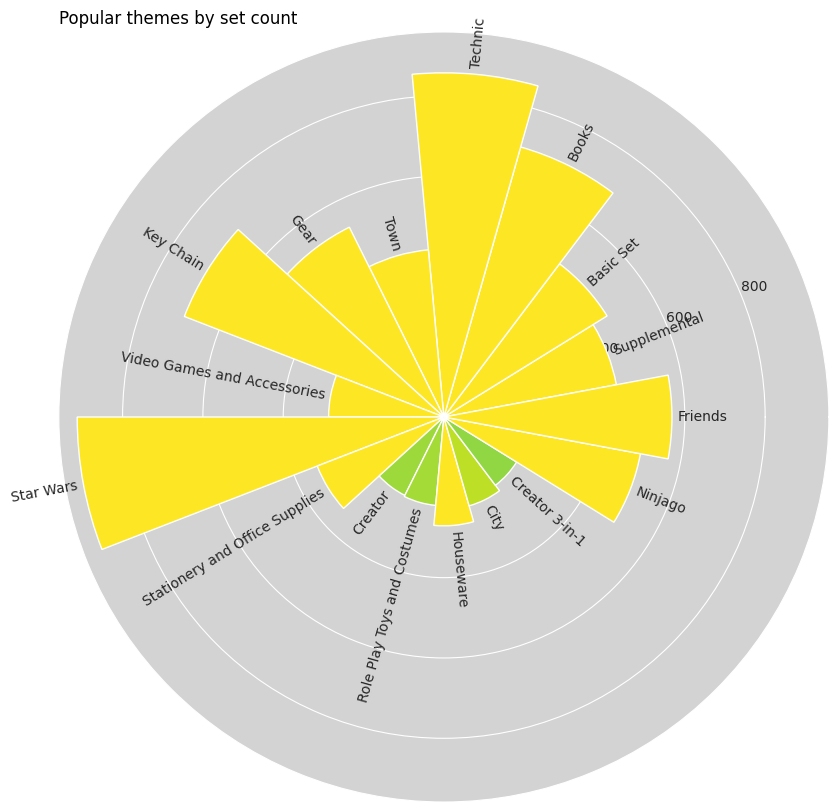

In [215]:

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Set the background color
ax.set_facecolor('lightgray')

# Set min and max value
lowerLimit = 0
max_v = max(sought_after['count'])

# Set heights and width
heights = sought_after['count']
width = 2 * np.pi / len(sought_after['theme_name'])

# Set index and angle
indexes = list(range(1, len(sought_after['theme_name']) + 1))
angles = [element * width for element in indexes]

# Use a recognized colormap (e.g., 'viridis')
colormap = plt.get_cmap('viridis')

bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit,
              linewidth=1, edgecolor="white", color=colormap(heights))
labelPadding = 15

for bar, angle, height, label in zip(bars, angles, heights, sought_after['theme_name']):
    rotation = np.rad2deg(angle)
    alignment = ""
    # Deal with alignment
    if angle >= np.pi / 2 and angle < 3 * np.pi / 2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"
    ax.text(x=angle, y=lowerLimit + bar.get_height() + labelPadding,
            s=label, ha=alignment, va='center', rotation=rotation,
            rotation_mode="anchor")
    ax.set_thetagrids([], labels=[])

plt.title('Popular themes by set count', color='black', loc='left')
plt.show()